In [16]:
from google.cloud import storage
import random
import os
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
storage_client = storage.Client()
bucket = storage_client.bucket('soundboard_data')

In [5]:
train_labels_df = pd.read_csv('../data/train_labels_yt.csv')
train_labels_df.head()

,Unnamed: 0,YTID,start_seconds,end_seconds,positive_labels,tags_k,tags,num_keys,num_tags
0,0,--PJHxphWEs,30.0,40.0,"/m/09x0r,/t/dd00088","['/m/09x0r', '/t/dd00088']","['Human Sounds', 'Sounds of things']",2,2
1,1,--aE2O5G5WE,0.0,10.0,"/m/03fwl,/m/04rlf,/m/09x0r","['/m/03fwl', '/m/04rlf', '/m/09x0r']","['Animal', 'Music', 'Human Sounds']",3,3
2,2,--aaILOrkII,200.0,210.0,"/m/032s66,/m/073cg4","['/m/032s66', '/m/073cg4']","['Sounds of things', 'Sounds of things']",2,2
3,3,--cB2ZVjpnA,30.0,40.0,/m/01y3hg,['/m/01y3hg'],['Sounds of things'],1,1
4,4,--ekDLDTUXA,30.0,40.0,"/m/015lz1,/m/07pws3f","['/m/015lz1', '/m/07pws3f']","['Human Sounds', 'Source-ambiguous sounds']",2,2


In [25]:
non_music_df = train_labels_df[~train_labels_df["tags"].str.contains('Music')].reset_index(drop=True)
non_music_df.head(20)

,Unnamed: 0,YTID,start_seconds,end_seconds,positive_labels,tags_k,tags,num_keys,num_tags
0,0,--PJHxphWEs,30.0,40.0,"/m/09x0r,/t/dd00088","['/m/09x0r', '/t/dd00088']","['Human Sounds', 'Sounds of things']",2,2
1,2,--aaILOrkII,200.0,210.0,"/m/032s66,/m/073cg4","['/m/032s66', '/m/073cg4']","['Sounds of things', 'Sounds of things']",2,2
2,3,--cB2ZVjpnA,30.0,40.0,/m/01y3hg,['/m/01y3hg'],['Sounds of things'],1,1
3,4,--ekDLDTUXA,30.0,40.0,"/m/015lz1,/m/07pws3f","['/m/015lz1', '/m/07pws3f']","['Human Sounds', 'Source-ambiguous sounds']",2,2
4,6,-0DdlOuIFUI,50.0,60.0,"/m/0130jx,/m/02jz0l,/m/0838f","['/m/0130jx', '/m/02jz0l', '/m/0838f']","['Sounds of things', 'Sounds of things', 'Natu...",3,3
5,7,-0O3e95y4gE,100.0,110.0,"/m/07r4wb8,/t/dd00125","['/m/07r4wb8', '/t/dd00125']","['Sounds of things', 'Channel environment and ...",2,2
6,9,-0mjrMposBM,80.0,90.0,/m/04zmvq,['/m/04zmvq'],['Sounds of things'],1,1
7,13,-1iKLvsRBbE,80.0,90.0,"/m/015lz1,/m/07pws3f","['/m/015lz1', '/m/07pws3f']","['Human Sounds', 'Source-ambiguous sounds']",2,2
8,15,-275_wTLm-4,7.0,17.0,/m/07q6cd_,['/m/07q6cd_'],['Sounds of things'],1,1
9,16,-28U1_qW0sU,30.0,40.0,/m/07qwdck,['/m/07qwdck'],['Source-ambiguous sounds'],1,1


### Take 1 sec segments of audio, save to spectrograms

In [26]:
spec_dir = "../data/spec_images_instruments/non_music/"

In [29]:
def save_non_music_specs(length, num_clips):
    
    ## Saves num_clips number of spectrograms of 'length' seconds long. Length should be between 0 and 10

    for index, row in non_music_df.iterrows(): 

        if index >= (num_clips):
            break

        ytid = row['YTID']
        class_ = row['tags']
        blob = bucket.blob(f"train_{row['YTID']}.wav")

        # Check if file already exists
        if os.path.exists(spec_dir + ytid + ".png"):
            print(f"File {ytid} already exists, skipping save.")

        else:
            print(f"File {index}: {ytid}, {class_}")

            # Download the audio file to a local file
            file_path = os.path.join('../data/temp_audio', blob.name.split('/')[-1])
            blob.download_to_filename(file_path)

            y, sr = librosa.load(file_path)

            # Take a random 1 second sample of the audio
            start_time = random.uniform(0, max(len(y) / sr - length, 0))
            end_time = start_time + length
            y_sample = y[int(start_time * sr):int(end_time * sr)]

            # Compute spectrogram
            spec = np.abs(librosa.stft(y_sample))

            # Convert to decibels
            spec_db = librosa.amplitude_to_db(spec, ref=np.max)

            plt.axis('off')
            plt.axes([0,0,1,1])

            # Plot spectrogram
            librosa.display.specshow(spec_db, sr=sr,cmap='gray')

            # Save as image
            plt.savefig(spec_dir + ytid + ".png")

            os.remove(file_path)


File 0: --PJHxphWEs, ['Human Sounds', 'Sounds of things']
File 1: --aaILOrkII, ['Sounds of things', 'Sounds of things']
File 2: --cB2ZVjpnA, ['Sounds of things']
File 3: --ekDLDTUXA, ['Human Sounds', 'Source-ambiguous sounds']
File 4: -0DdlOuIFUI, ['Sounds of things', 'Sounds of things', 'Natural Sounds']


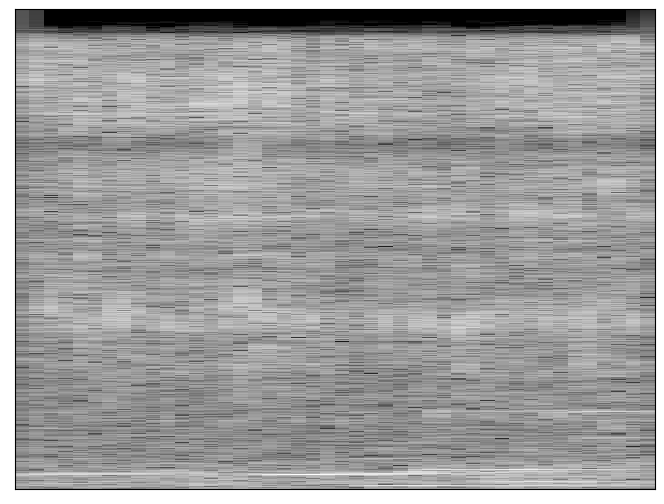

In [30]:
## Run (test) function to save 5 1 second-long images 
save_non_music_specs(1, 5)